In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
%cd /content/drive/My Drive/CS 577 Project/test_data/images/content/
%ls

PATH_input = '/content/drive/My Drive/CS 577 Project/test_data/images/content/'
PATH_output = '/content/drive/My Drive/CS 577 Project/test_data/images/output/'

/content/drive/My Drive/CS 577 Project/test_data/images/content
5.jpg  figures.jpg  parrot.jpg


In [29]:
import os
import numpy as np
import cv2
#from PIL import Image as im
from matplotlib import pyplot as plt
from matplotlib import patches
from PIL import Image
from IPython.display import clear_output
from pathlib import Path
import torch

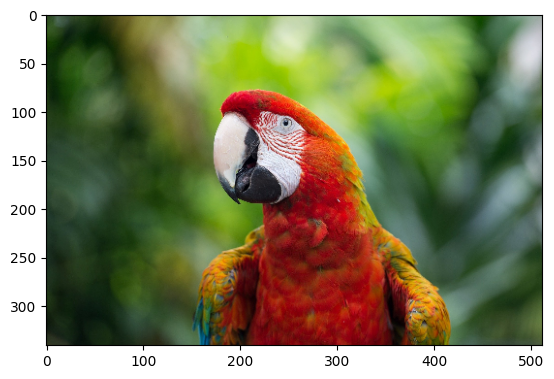

In [23]:
# Setup image and mask

#Insert your file name and extension here
img = cv2.imread('/content/drive/My Drive/CS 577 Project/test_data/images/content/parrot.jpg',1)
img = cv2.resize(img, (0, 0),fx = 512/1920,  fy = 512/1920)
img = img[:,:,::-1]
mask = np.zeros(img.shape[:2],np.uint8)

# GrabCut parameters
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
imageHeight = img.shape[:2][0]
imageWidth = img.shape[:2][1]

#Show image
figure, ax = plt.subplots(1)
ax.imshow(img)

In [24]:
np.shape(img)

(341, 512, 3)

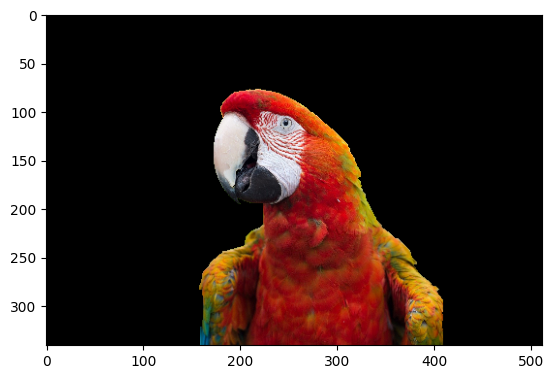

In [31]:
# Grabcut algorithm with rectangle for foreground item
cv2.grabCut(img,mask,(150,60,260,341-60),bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
# Show current image only with rectangle
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img)
data = Image.fromarray(img)
data.save(PATH_output + 'parrot_out.png')